# **Chi-Square Test of Independence**
#### **The quantitative measure that allows you to confirm relations**

# **1.When to use this test?**

In order to confirm the **relationship between two categorical variables**, a plot like a stacked bar chart or a mosaic plot might be enough.

However, there are different scenarios in which you might  want to complement the plot with the Chi-square test.

#### **a) To Make a Definitive Conclusion about Significance**

This is the most important reason. A plot can suggest a relationship, but it can't tell you if that relationship is meaningful.

When you need to answer "*Is this effect real?*" with a measurable level of confidence, the test is really useful.

#### **b) For Objective Decision-Making and Reporting**

Plots are subjective—two people might look at the same chart and draw different conclusions. Such a statistical test provides an objective standard. 

Whenever you need to convince a critical audience, make a data-driven decision, or include results in formal research, don’t forget to implement them.

#### **c) When the Effect is Subtle and Not Visually Obvious**

Sometimes, a relationship exists but is too subtle for the human eye to reliably detect in a plot, especially with large sample sizes or many categories.

#### **d) Before Quantifying the Strength of the Association (Follow-up Tests)**

As I have said before, a Chi-square test tells you how significant a relationship between (categorical) variables is, but not how strong it is. Despite this drawback, it is still a good starting for subsequent measures like the [Cramér’s V coefficient](https://www.geeksforgeeks.org/data-analysis/calculate-cramer-s-coefficient-matrix-using-pandas/).

# **2. Practice Example**

In this Jupyter Notebook we will implement the Chi-square test to detect whether two categorical variables are independent or not. 

Imagine the company *Nutflux* has 3 different subscription plans (*Basic*, *Plus* and *Premium*) and wants to see if the preference for these plans is independent of the customer's age group (18-25, 26-40, 41-60, 61+). 

In [ ]:
# Import the dependencies we need
import pandas as pd  # To store data
import numpy as np # To numerical computation
import matplotlib.pyplot as plt # Tool for pandas to plot
from scipy.stats import chi2_contingency # To compute the chi-square test

## **Analysis**

We start by creating the imaginary dataset for Nutflux.

In [4]:
# Set a seed for reproducibility
np.random.seed(42)  # The answer to everything

# Define the sizes for each age group
age_groups = ['18-25', '26-40', '41-60', '61+']
age_distribution = [125, 150, 125, 100]

# Create the base DataFrame
data = []
for age, count in zip(age_groups, age_distribution):
    data.extend([age] * count)

df = pd.DataFrame(data, columns=['Age_Group'])

# Now assign subscription plans with a bias for each age group

plan_probabilities = {
    # [Prob_Basic, Prob_Plus, Prob_Premium]
    '18-25': [0.23, 0.44, 0.33],
    '26-40': [0.15, 0.53, 0.32],
    '41-60': [0.19, 0.52, 0.29],
    '61+':   [0.23, 0.42, 0.35]
}

plans = ['Basic', 'Plus', 'Premium']

df['Subscription_Plan'] = df['Age_Group'].apply(
    lambda x: np.random.choice(plans, p=plan_probabilities[x])
)

The most important step in the creation has been the fact of assigning slightly different probabilities for each plan depending on the age group of every user via `plan_probabilities`. The goal of the chi-square test will be determine whether this changes in the probabilities are significant to stablish a relationship or not.

In [5]:
# Show 10 rows randomly
df.sample(10)

,Age_Group,Subscription_Plan
451,61+,Plus
174,26-40,Plus
15,18-25,Basic
393,41-60,Premium
192,26-40,Premium
40,18-25,Basic
124,18-25,Basic
317,41-60,Basic
187,26-40,Plus
140,26-40,Premium


If we wanted to check any pattern between `Subscription_Plan` and `Age_Group` visually, good approaches are mosaic plots and stacked bar charts. We will proceed with the latter.

To do so, we will need to make a contingency table displaying the proportions/percentages.

In [6]:
# Create a contingency table for the stacked bar chart (and the Chi-Square test)
contingency_table = pd.crosstab(df['Age_Group'], df['Subscription_Plan'])
contingency_table

Subscription_Plan,Basic,Plus,Premium
Age_Group,,,
18-25,36,49,40
26-40,20,80,50
41-60,29,63,33
61+,25,39,36


In [7]:
# Create a new table where each row sums to 100%
sum_rows_ct = contingency_table.sum(axis='columns').values
contingency_table_pct = contingency_table.div(sum_rows_ct, axis='index')*100
contingency_table_pct.round(2)

Subscription_Plan,Basic,Plus,Premium
Age_Group,,,
18-25,28.80,39.20,32.00
26-40,13.33,53.33,33.33
41-60,23.20,50.40,26.40
61+,25.00,39.00,36.00


Text(0.5, 1.0, 'Is it notable the relationship?')

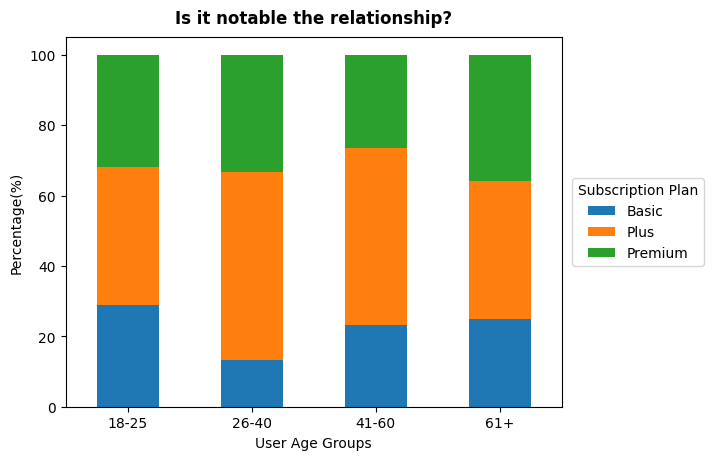

In [8]:
# Plot the stacked bar chart to observe any relation
ax = contingency_table_pct.plot.bar(stacked=True, rot=0)
ax.legend(title='Subscription Plan', loc='right',  bbox_to_anchor=(1.3,0.5))
ax.set_xlabel('User Age Groups')
ax.set_ylabel('Percentage(%)')
ax.set_title('Is it notable the relationship?', fontweight='bold', pad=10)

The plot’s message is clear: user between 26 and 40 years are more likely to purchase the plus plan than other age groups.

However, we don’t know **how significant the relation is**. Not only does the Chi-square test answer this question, but it also quantifies it. That's why the chi-square test becomes handy, as it allows us to determine whether the relation between two categorical variables is significant (not to be confused with strong).

The good news are that it is easy to run this test in Python with the `scipy.stats` library, as we only need the `contingency_table` we've already made as the input.

In [9]:
# Run the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f'chi-square statistic: {chi2}\np-value: {p_value}\ndegrees of freedom: {dof}\nexpected values:\n{expected}')

chi-square statistic: 14.6300117073702
p-value: 0.02333806755384455
degrees of freedom: 6
expected values:
[[27.5  57.75 39.75]
 [33.   69.3  47.7 ]
 [27.5  57.75 39.75]
 [22.   46.2  31.8 ]]


## **Explanation of the Chi-square test**

The test poses two different hypotheses: $$H_0:\text{Suscription plans and user age groups are independent}$$ $$\text{vs}$$ $$H_1:\text{Suscription plans and user age groups are NOT independent}$$

Let $p_i$ be the probability that a user has $i$ years, where $i\in\{18-25,26-40,41-60,61+\}$, and $q_j$ the probability a user has the $j$ plan, where $j\in\{basic,plus,premium\}$. Then we can denote the probability a user has $i$ years and the $j$ plan as $\theta_{i,j}$. Because of the definition of independent events from probability, the hypotheses can be rewritten as $$H_0:\theta_{i,j}=p_iq_j,\,\forall i,j$$ $$\text{vs}$$ $$H_1:\theta_{i,j}\neq p_iq_j,\,\forall i,j$$

As we don't know the actual values $p_i$ and $q_j$, we can use the (maximum likelihood) estimators $\hat{p}_i=\frac{m_i}{n}$ and $\hat{q}_j=\frac{n_j}{n}$, where $n$ is the number of users in the sample or dataset, 500, and $m_i$ ($n_j$) the number of those users who have $i$ years (the $j$ plan). 

In order to decide whether we should reject or not the null hypothesis $H_0$, it is convenient to explain the output of `chi2_contingency`.

### Expected values

Let's return for a moment to the contigency table:

| Subscription_Plan  | Basic | Plus | Premium |
|-----------|-------|------|---------|
| **Age_Group**  | |  | |
| 18-25     | 36    | 49   | 40      |
| 26-40     | 20    | 80   | 50      |
| 41-60     | 29    | 63   | 33      |
| 61+       | 25    | 39   | 36      |


These values are called *observed values* $o_{i,j}$ for $i$ and $j$, since they come from the analysis. For example, $o_{26-40,plus}$ (the observed value from users having between 26 and 40 and a plus plan) is 80. If we assumed there is no relationship between subscription plans and age groups, i.e. we were under the null hypothesis, the *expected values* $e_{i,j}$ for $i$ and $j$ could be obtained by using $$e_{i,j} = n\theta_{i,j}=np_iq_j\approx n\hat{p}_i\hat{q}_j=n\frac{m_i}{n}\frac{n_j}{n}=\frac{m_in_j}{n}$$ So to do that, we first need $m_i$ and $n_j$.

In [ ]:
# Create a new (copy) of the contingency table
contingency_table2 = contingency_table.copy()

# Sum rows
contingency_table2['Sum_Ages (m_i)'] = contingency_table.sum(axis=1)

# Sum columns
n_j = pd.DataFrame(contingency_table2.sum()).T
n_j.index = ['Sum_Plans (n_j)']

# Concatenate the sums in the contingency table
expanded_contingency_table = pd.concat([contingency_table2, n_j])
expanded_contingency_table.index.name = 'Age_Group'

expanded_contingency_table

Subscription_Plan,Basic,Plus,Premium,Sum_Ages (m_i)
Age_Group,,,,
18-25,36,49,40,125
26-40,20,80,50,150
41-60,29,63,33,125
61+,25,39,36,100
Sum_Plans (n_j),110,231,159,500


Observe that the last cell value, 500, is the number of users within the sample: $n$. From here (and under the null hypothesis), we now know that, for example, $e_{26-40,plus}$ (the expected value of users having between 26 and 40 and a plus plan) is equal to $\frac{150\cdot231}{500}=69.30$. Note that this value is actually the same as the one from the 2nd row and 2nd column coefficient from the `expected` matrix:

In [11]:
expected[1, 1]

np.float64(69.3)

If we used that matrix to fill the contigency table, the notion of expected values becomes more evident.

In [12]:
expected_cont_table = pd.DataFrame(expected,
                                   index=contingency_table.index,
                                   columns=contingency_table.columns
                                   )

expected_cont_table

Subscription_Plan,Basic,Plus,Premium
Age_Group,,,
18-25,27.5,57.75,39.75
26-40,33.0,69.30,47.70
41-60,27.5,57.75,39.75
61+,22.0,46.20,31.80


This is the expected contingency table under the null hypothesis of independence!!!

Furthermore, we can plot a stacked bar chart of this (expected) contingency table next to the (observed) original one to see the difference more notably.

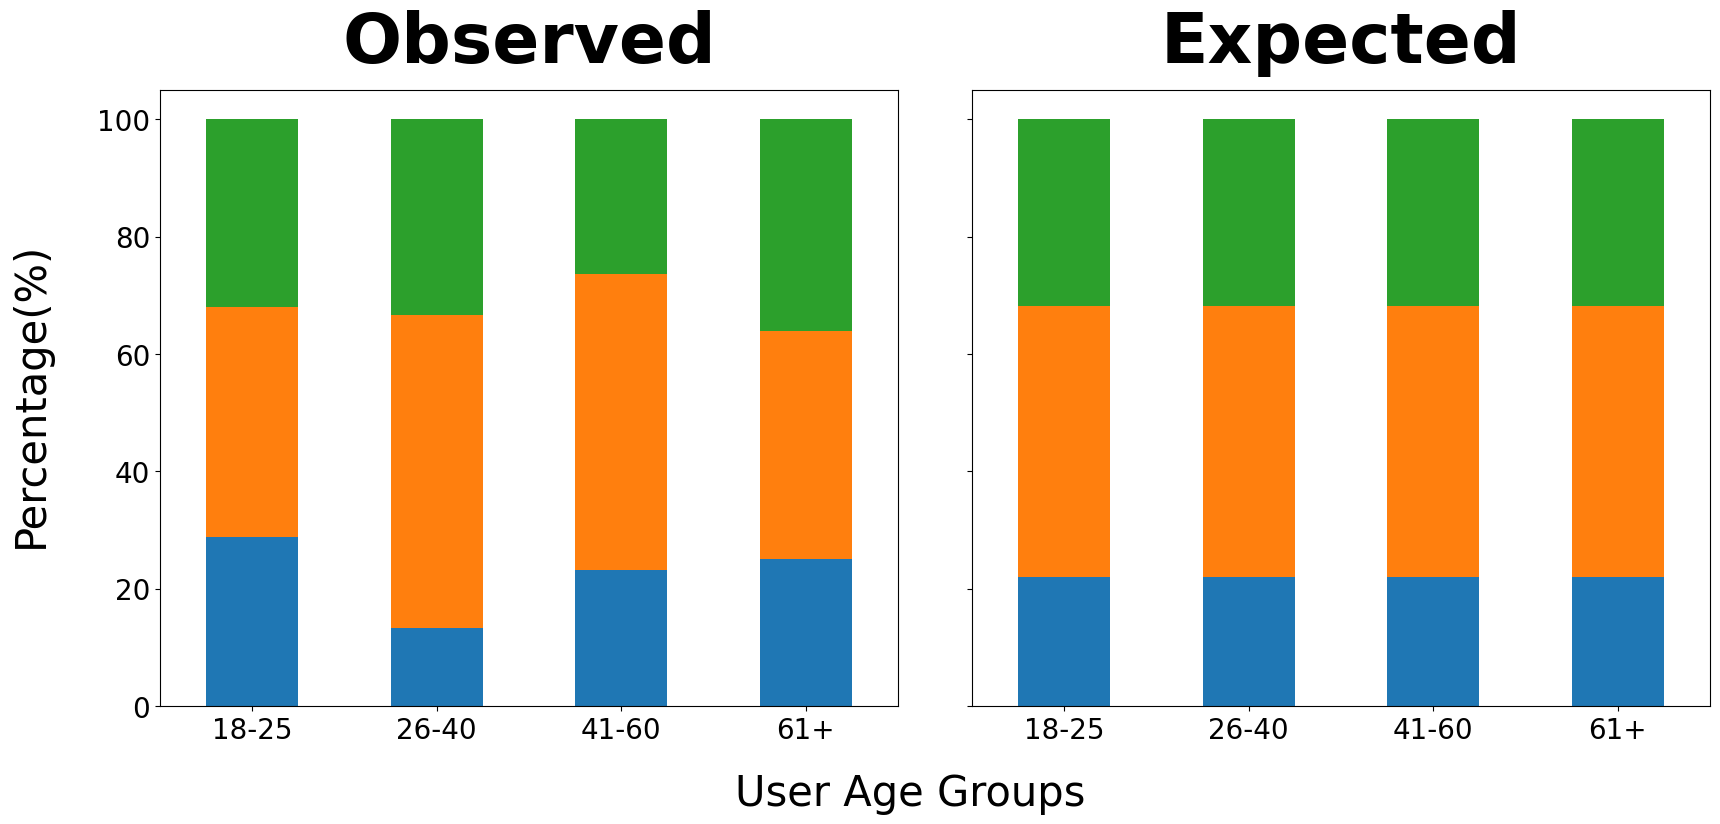

In [13]:
# Transform the expected cont. table into percentages for rows
sum_rows_df = expected_cont_table.sum(axis='columns').values
exp_cont_table_pct = expected_cont_table.div(sum_rows_ct, axis='index')*100
exp_cont_table_pct.round(2)

# Plot the stacked bar charts for observed and expected cont. tables
plt.rcParams.update({
    'xtick.labelsize': 20,         # x-axis tick labels
    'ytick.labelsize': 20,         # y-axis tick labels
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# Observerd plot
contingency_table_pct.plot.bar(stacked=True, rot=0, ax=ax1, legend=False)
ax1.set_title('Observed', fontweight='bold', pad=20, fontsize=50)
ax1.set_xlabel('')

# Expected plot
exp_cont_table_pct.plot.bar(stacked=True, rot=0, ax=ax2, legend=False)
ax2.set_title('Expected', fontweight='bold', pad=20, fontsize=50)
ax2.set_xlabel('')

fig.supxlabel('User Age Groups', fontsize=30, y=-0.025)
fig.supylabel('Percentage(%)', fontsize=30, x=0.05)

plt.subplots_adjust(wspace=0.1)

As you can see, the expected stacked bar chart does not change the proportions of users depending on the two attributes (age and plan).

### Chi-square statistic

Let $r$ the total number of states than one attribute can have and let $s$ be the same total number for the other attribute. In our example, we set $r=4$ and $s=3$ since we have 4 different age groups and 3 different plans. We can define *chi-square statistic* formally as the following: $$d_n=\sum_{i=1}^r\sum_{j=1}^s\frac{(o_{i,j}-e_{i,j})^2}{e_{i,j}}$$

What this formula is actually telling us is how much every observed value differs (to the square) from its respective expected value. For example, remembering $o_{26-40,plus}=80$ and $e_{26-40,plus}=69.30$, we have $$\frac{(80-69.30)^2}{69.30}$$ or, in other words, the observed value of user between 26-40 years and a plus differs approximately 4 times (to the square) with respect its expected value. Adding all these rates one can obtain the chi-square statistic. The bigger this statistic is, the more notabe are the differences between observed and expected values.

In order to avoid calculating it by hand, we can use either array arithmetic or `chi2_contingency` from Python:

In [14]:
((contingency_table.values - expected)**2/expected).sum(), chi2

(np.float64(14.6300117073702), np.float64(14.6300117073702))

It is important to observe the chi-square statistic depends on the sample we have on the dataset. Every customer has a probability $\theta_{i,j}$ of having $i$ years and plan $j$ and this affects both $o_{i,j}$ and $e_{i,j}$. Thus, changing either the size or the users from the sample implies getting a different value from the statistic. This motivates the construction of the random variable $D_n$ associated with the chi-square statistic $d_n$.

In summary, $d_n$ is a number which is obtained from the actual sample of $n$ users (the one in the *Nutflux*'s dataset) and the formula we've defined, while $D_n$ is a random variable which comes from a random sample of $n$ users with probabilities $\theta_{i,j}$. Therefore, $d_n$ is one of the possible values of $D_n$.

### Degrees of freedom

Although it is beyond the scope of this post, it can be proved $$D_n\overset{\mathcal{L}}{\longrightarrow}\chi^2_{(rs-r-s+1)},\text{ when }n\rightarrow\infty$$ In other words, the distribution of values of $D_n$ (including $d_n$, of course) can be approximated by the well-known distribution of the $\chi^2_{(rs-r-s+1)}$ when $n$ is large, as it is in this case for $n=500$. 

The subscript of $\chi^2$ is called the *degrees of freedom*. Taking into account we set $r=4$ and $s=3$ previously, we have $$rs-r-s+1=6$$ degrees of freedom.

In [15]:
dof

6

To decide whether we can reject $H_0$ or not, we have to fix what is called a *significance level* $\alpha$. As investigators, $\alpha$ is the maximum probability we are willing to accept of rejecting $H_0$ when it is actually true. This is important as we don't want to assume that there is relationship between the variables when it is not actually the case. The most popular values to choose are 0.05, 0.025 and 0.01. As $\alpha$ is a parameter we can set to the value we want, we won't fix it yet.

For the chi-square test, $$\text{we can only reject } H_0 \text{ if } d_{500}>c_{\alpha,6}$$ where $c_{\alpha,6}$ is the number such that $P(\chi^2_{(6)}>c_{\alpha,6})=\alpha\approx P(D_{500}>c_{\alpha,6})$. The approximation is because of the convergence I showed earlier. Thus the probability of getting $d_{500}>c_{\alpha,6}$ is $\alpha$. We have strong evidence to reject the null hypothesis, althought it might be true.

We could try computing $c_{\alpha,6}$ with statistical tools such as softwares or calculators, but there is a better alternative, which the last output from `chi2_contingency`.

### P-value

The *p-value* gives use the probability that $D_{500}>d_{500}$. If the p-value $<\alpha$, then we can reject $H_0$. Here is why: $$P(D_{500}>d_{500})=\text{p-value}<\alpha$$ so the probability of getting $d_{500}>c_{\alpha,6}$ is less than $\alpha$, rejecting the null hypothesis subsequently. On the other hand, if the p-value $\geq\alpha$, we would not have strong evidence to reject it.



In [16]:
p_value

np.float64(0.02333806755384455)

In our example, if we set $\alpha=0.05=5\%$ then $0.023<0.05$, rejecting the null hypothesis and assuming a (significant) relationship between age and plans of users. However, if $\alpha=0.01=1\%$, since $0.023\geq0.01$, we can't reject the null hypothesis and there is not any (significant) relationship.

# **3. Some last considerations**

Although the chi-square test is intended to be applied for categorical variables, discretizing numerical variables (also called "binning") into intervals, thus converting them into categorical variables, is a very common and valid approach to apply the Chi-Square test of independence. This is what we did in the *Nutflux*'s example for the agers of the users: 18-25, 26-40, 41-60, 61+.

However, this powerful technique comes with important **trade-offs and considerations**:

1. **Loss of Information:** This is the biggest drawback. It implies throwing away the precise numerical information. The test will tell if the groups are related, but not the nature of the relationship (e.g., linear, quadratic). A 29-year-old and a 30-year-old are put in different bins, even though they are very similar.

2. **Choice of Bins is Arbitrary and Influential:** The results can change dramatically based on how the bins are definded.

    - Different bin boundaries can lead to different p-values and conclusions.

    - Too few bins (over-aggregation) can hide interesting patterns.

    - Too many bins can lead to sparse cells in the contingency table, which violates the assumptions of the chi-square test (see next point).

3. **Chi-Square Test Assumptions:** The binning strategy must ensure the assumptions of the chi-square test:

    - The test requires a sufficiently large sample size: $n$

    - No more than 20% of the expected counts in the contingency table should be less than 5

    - All individual expected counts should be 1 or greater.